In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import SMOTE

In [2]:
df=pd.read_csv('loan_train.csv')

df.head()

,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income,Debt_to_Income_Ratio
0,1,0,0,0,0,128.0,0,1,2,1,5849.0,0.021884
1,1,1,1,0,0,128.0,0,1,0,0,6091.0,0.021015
2,1,1,0,0,1,66.0,0,1,2,1,3000.0,0.022000
3,1,1,0,1,0,120.0,0,1,2,1,4941.0,0.024287
4,1,0,0,0,0,141.0,0,1,2,1,6000.0,0.023500


In [3]:
X=df.drop('Loan_Status',axis=1)
y=df['Loan_Status']

In [4]:
# Train test split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [5]:
# Balancing the training data with SMOTE
smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

In [6]:
# Scaling numerical features
scaler = StandardScaler()
numerical_features = ['LoanAmount', 'Total_Income', 'Debt_to_Income_Ratio']
X_train[numerical_features] = scaler.fit_transform(X_train[numerical_features])
X_test[numerical_features] = scaler.transform(X_test[numerical_features])

In [7]:
clf=DecisionTreeClassifier(random_state=42)

In [8]:
clf.fit(X_train,y_train)

DecisionTreeClassifier(random_state=42)

In [9]:
y_pred = clf.predict(X_test)

In [10]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)
print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(report)

[[27 16]
 [21 59]]
Accuracy: 0.6991869918699187
Classification Report:
              precision    recall  f1-score   support

           0       0.56      0.63      0.59        43
           1       0.79      0.74      0.76        80

    accuracy                           0.70       123
   macro avg       0.67      0.68      0.68       123
weighted avg       0.71      0.70      0.70       123



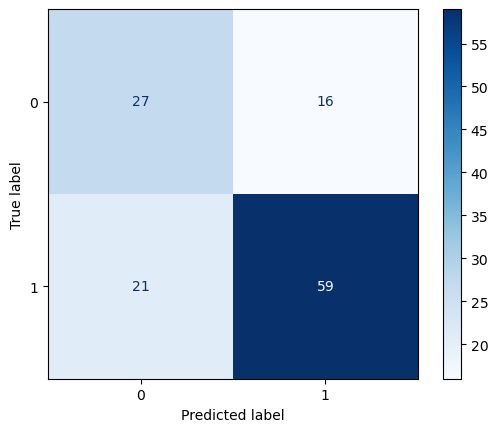

In [11]:
conf_matrix = confusion_matrix(y_test, y_pred)

# Display the confusion matrix with custom labels
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix
                             )
disp.plot(cmap="Blues")


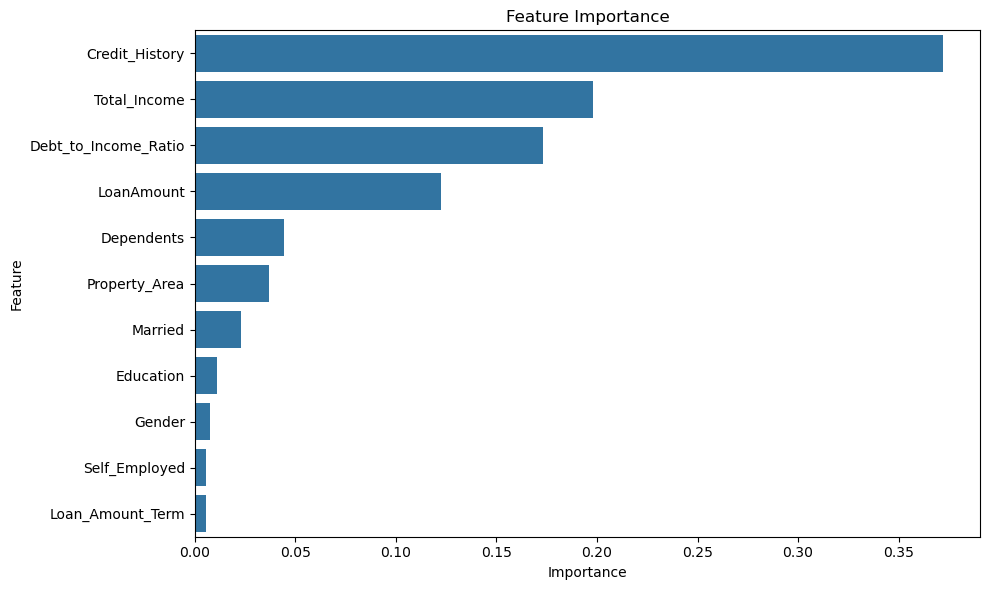

In [12]:
# Feature Importance
importance = clf.feature_importances_
feature_names = X.columns
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importance})
feature_importance_df.sort_values(by='Importance', ascending=False, inplace=True)

# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance')
plt.tight_layout()
plt.show()

# Hyper-parameter tuning

In [13]:
param_grid = {
    'max_depth': [5, 10, 15, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_
best_model

DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_split=10,
                       random_state=42)

In [14]:
X=df.drop('Loan_Status',axis=1)
y=df['Loan_Status']

In [32]:
# train test
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

# Balancing the training data with SMOTE
smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

In [33]:
clf1=DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=4,
                       min_samples_split=10, random_state=42)

In [34]:
clf1.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=4,
                       min_samples_split=10, random_state=42)

In [35]:
y_pred1 = clf1.predict(X_test)

In [36]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred1)
report = classification_report(y_test, y_pred1)
conf_matrix = confusion_matrix(y_test, y_pred1)
print(conf_matrix)
print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(report)

[[22 21]
 [ 7 73]]
Accuracy: 0.7723577235772358
Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.51      0.61        43
           1       0.78      0.91      0.84        80

    accuracy                           0.77       123
   macro avg       0.77      0.71      0.73       123
weighted avg       0.77      0.77      0.76       123



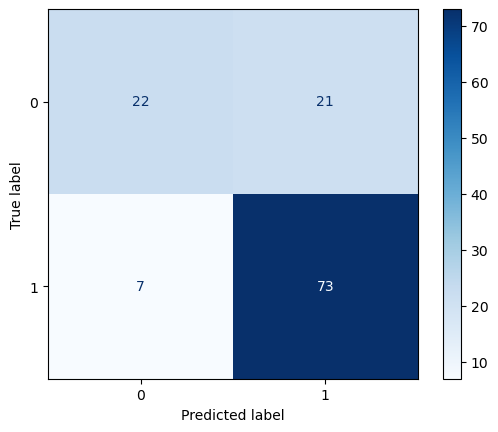

In [37]:
conf_matrix = confusion_matrix(y_test, y_pred1)

# Display the confusion matrix with custom labels
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix
                             )
disp.plot(cmap="Blues")

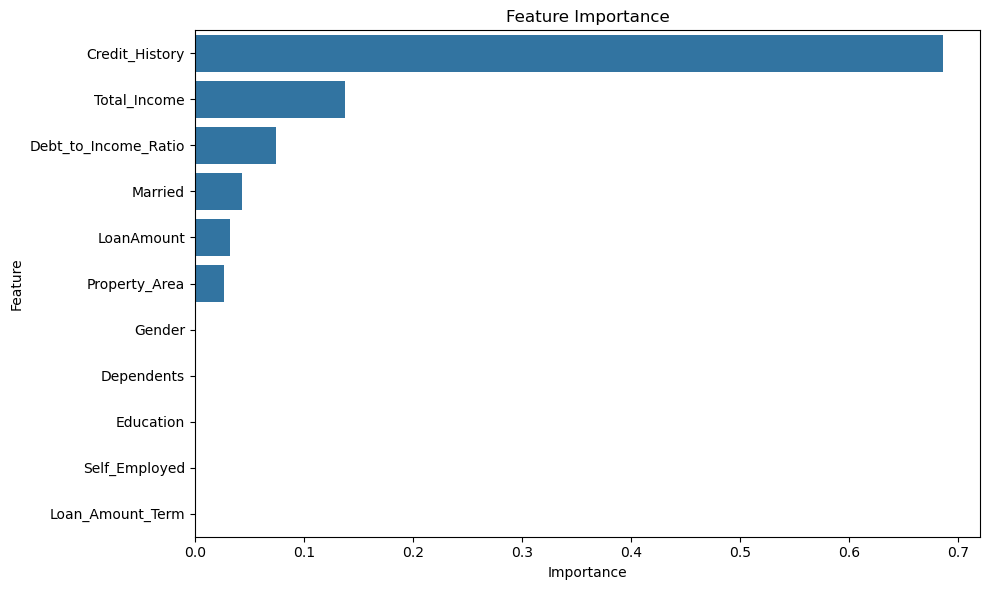

In [21]:
# Feature Importance
importance = clf1.feature_importances_
feature_names = X.columns
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importance})
feature_importance_df.sort_values(by='Importance', ascending=False, inplace=True)

# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance')
plt.tight_layout()
plt.show()